In [25]:
from utilityFunctions import load_csv_to_matrix_batch, compute_color_preference_distance_batch, compute_color_preference_raw_batch, show_heatmaps, compute_color_similarity_distance_batch, compute_correlations, RSA, split_and_average_matrices, split_and_average_matrices_100
from utilityFunctions_GWOT import compute_GWOT_for_all_pairs
import numpy as np
import pickle
import os

unique_colours = np.array(['#d2b700', '#db8b08', '#c7512c', '#c13547', '#a03663', '#753a7a', '#4b488e', '#005692', '#006a8b', '#007b75', '#008a52', '#9aa400'])
colour_index = {colour: idx for idx, colour in enumerate(unique_colours)}
matrix_size = len(unique_colours)
response_type = 'preference'

In [26]:
folder_path = 'raw_data/202411_data_without19'

In [27]:
response_type = 'preference'
subject_matrices_preference = load_csv_to_matrix_batch(folder_path, response_type, colour_index, matrix_size)
subject_matrices_preference_raw = compute_color_preference_raw_batch(subject_matrices_preference)
subject_matrices_preference_distance = compute_color_preference_distance_batch(subject_matrices_preference)

Order of files being loaded:
raw_data/202411_data_without19/subject_01_551325.csv
raw_data/202411_data_without19/subject_02_5a9b20.csv
raw_data/202411_data_without19/subject_03_5eb05d.csv
raw_data/202411_data_without19/subject_04_609c10.csv
raw_data/202411_data_without19/subject_05_60d129.csv
raw_data/202411_data_without19/subject_06_610814.csv
raw_data/202411_data_without19/subject_07_6171f3.csv
raw_data/202411_data_without19/subject_08_65a3ab.csv
raw_data/202411_data_without19/subject_09_65f13c.csv
raw_data/202411_data_without19/subject_10_65f18d.csv
raw_data/202411_data_without19/subject_11_65fa3b.csv
raw_data/202411_data_without19/subject_12_663180.csv
raw_data/202411_data_without19/subject_13_667c6c.csv
raw_data/202411_data_without19/subject_14_667df4.csv
raw_data/202411_data_without19/subject_15_668110.csv
raw_data/202411_data_without19/subject_16_6681ad.csv
raw_data/202411_data_without19/subject_17_66906a.csv
raw_data/202411_data_without19/subject_18_66a502.csv


In [28]:
def reorder_matrices_by_row_average(matrices):
    reordered_matrices = []
    
    for matrix in matrices:
        # Compute row-wise averages
        row_averages = np.mean(matrix, axis=1)
        # Get indices that would sort the rows by average (descending)
        sorted_indices = np.argsort(-row_averages)
        # Reorder rows and columns using the same sorted indices
        reordered_matrix = matrix[sorted_indices][:, sorted_indices]
        reordered_matrices.append(reordered_matrix)
    
    return reordered_matrices

In [29]:
subject_matrices_preference_raw_reordered = reorder_matrices_by_row_average(subject_matrices_preference_raw)

In [30]:
len(subject_matrices_preference_raw)

18

In [31]:
grouping_averaged_allcombination_preference_raw = split_and_average_matrices_100(subject_matrices_preference_raw_reordered)

In [32]:
len(grouping_averaged_allcombination_preference_raw)

100

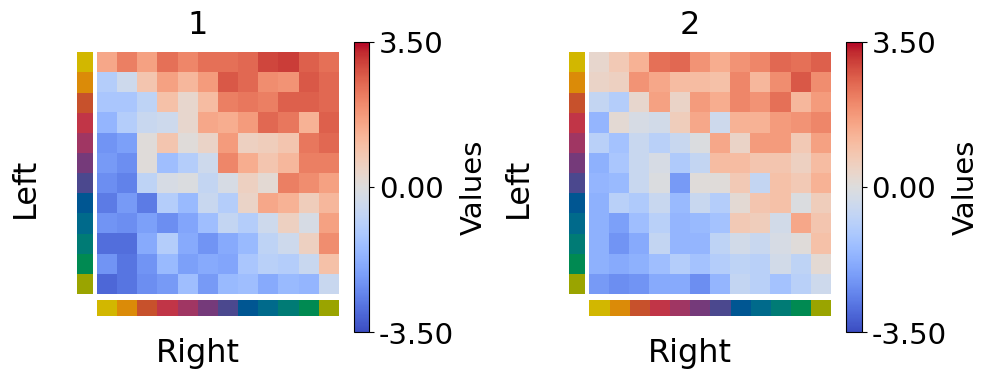

In [40]:
pair_of_preference = grouping_averaged_allcombination_preference_raw[4]
show_heatmaps(vmin_val=-3.5, vmax_val=3.5, matrices=list(pair_of_preference), titles=list(range(1, 3)), nrows=1, ncols=2, cmap_name = "coolwarm", cbar_label="Values", color_labels=unique_colours)

In [41]:
filename = "list_average_of_all_possible_splitting_preference_reordered_raw.pkl"

with open(filename, "wb") as file:
    pickle.dump(grouping_averaged_allcombination_preference_raw, file)
print(f"Results successfully saved")

Results successfully saved


In [34]:
subject_matrices_preference_distance_reordered = reorder_matrices_by_row_average(subject_matrices_preference_distance)

In [35]:
grouping_averaged_allcombination_preference_distance = split_and_average_matrices_100(subject_matrices_preference_distance_reordered)

In [36]:
filename = "list_average_of_all_possible_splitting_preference_reordered_distance.pkl"

with open(filename, "wb") as file:
    pickle.dump(grouping_averaged_allcombination_preference_distance, file)
print(f"Results successfully saved")

Results successfully saved
